#importing General libraries



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

#importing TensorFlow and Keras

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

#installing and importing Keras-Tunner

In [11]:
!pip install -U keras-tuner

In [12]:
import keras_tuner as kt

#load dataset

In [13]:
df = pd.read_csv('/content/diabetes.csv')

In [14]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [15]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [16]:
X.shape

(768, 8)

In [17]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [18]:
y.shape

(768,)

In [19]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

##Data splitting in ratio of 80-20

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 101)

In [13]:
x_train.shape

(614, 8)

In [14]:
x_test.shape

(154, 8)

In [15]:
y_train.shape

(614,)

In [16]:
y_test.shape

(154,)

#Preproceesing


In [17]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##one_hot_encode,LabelEncoding
###There is no need of one hot-hot-encoding and Label encoding as there is all type is already in integers.

#checking null values
###There is no null values. No need to replace any values with Mean,Mode....etc

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
df.notnull().sum()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

#Feature Scalling
##Standard Scalling

In [22]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train_scaled = scaller.fit_transform(x_train)
x_test_scaled = scaller.fit_transform(x_test)

In [23]:
x_train_scaled

array([[-0.5288778 , -0.8564829 , -0.26068567, ...,  0.73836846,
         0.62083528, -0.86196915],
       [ 0.07415093,  1.97417637,  0.46240372, ...,  0.61132398,
        -0.64915711, -0.19012014],
       [-0.5288778 ,  0.13891377, -0.46728263, ...,  0.20478164,
        -1.19432458, -0.19012014],
       ...,
       [-0.83039216, -0.04772311, -1.2936705 , ...,  0.42075725,
        -0.59959643, -0.6940069 ],
       [ 0.37566529, -0.17214769,  0.35910523, ..., -0.12553402,
        -0.40445126,  0.9016345 ],
       [ 1.58172274,  0.29444449,  0.04920978, ...,  0.25559943,
         0.55268935,  0.98561563]])

In [24]:
x_test_scaled

array([[-0.9062771 ,  0.11790879, -0.48459884, ..., -0.14157049,
        -0.32062639,  1.24632184],
       [-0.34122984,  2.07832507,  0.03437349, ...,  0.65978124,
        -0.15771333,  0.25650975],
       [ 0.78886468, -0.52485064,  1.17611262, ..., -1.08284077,
        -0.63540757,  1.33630476],
       ...,
       [ 0.50634105,  0.37501257,  0.03437349, ...,  0.53258255,
         0.21229261, -0.37337068],
       [ 1.63643557, -1.74609357,  1.90267388, ...,  0.54530242,
        -0.49734565,  1.24632184],
       [ 2.76653009, -0.71767847,  0.44955136, ...,  0.68522098,
        -0.14666838,  1.15633892]])

#Model Building

In [25]:
model = Sequential()

model.add(Dense(units=12,activation='relu',input_dim=8))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [26]:
model.compile(optimizer= 'Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(x_train_scaled,y_train,epochs=100,validation_data=(x_test_scaled,y_test),batch_size=32)

Epoch 1/100
20/20 [==============================] - 2s 19ms/step - loss: 0.6610 - accuracy: 0.6515 - val_loss: 0.6289 - val_accuracy: 0.7468
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6147 - accuracy: 0.6906 - val_loss: 0.5890 - val_accuracy: 0.7532
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5789 - accuracy: 0.7182 - val_loss: 0.5542 - val_accuracy: 0.7532
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5497 - accuracy: 0.7476 - val_loss: 0.5277 - val_accuracy: 0.7532
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5291 - accuracy: 0.7541 - val_loss: 0.5077 - val_accuracy: 0.7532
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5120 - accuracy: 0.7573 - val_loss: 0.4919 - val_accuracy: 0.7662
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4988 - accuracy: 0.7622 - val_loss: 0.4812 - val_accuracy: 0.7597
Epoch 8/100


#Hyperparameter Tunning with Keras Tuner

In [115]:
def build_model(hp):
  model = Sequential()
  counter = 0

  for i in range(hp.Int('num_layers',1 , 10)):
    if counter==0:

      model.add(Dense(hp.Int('units'+ str(i), 8,128),hp.Choice('activation',values =['relu','tanh','sigmoid']),input_dim=8))
      model.add(Dropout(hp.Choice('dropout', values= [.1,.2,.3,.4,.5,.6,.7,.8,.9])))
    else:

      model.add(Dense(hp.Int('units'+ str(i),8, 128),hp.Choice('activation', values=['relu','tanh','sigmoid'])))
      model.add(Dropout(hp.Choice('dropout', values = [.1,.2,.3,.4,.5,.6,.7,.8,.9])))

    counter = counter+1
  model.add(Dense(1,activation='sigmoid'))
  model.compile(hp.Choice('optimizer', values= ['adam','rmsprop','nadam','adagrad','adadelta']), hp.Choice('loss', values = ['hinge_loss','binary_crossentropy','huber_loss']),metrics =['accuracy'])

  return model



In [116]:
tuner = kt.RandomSearch(build_model,
                        max_trials=5,
                        objective= 'val_accuracy',
                        directory= 'mydirectory',
                        project_name = 'my_project'
                        )

Reloading Tuner from mydirectory/my_project/tuner0.json


In [117]:
model = tuner.search(x_train_scaled,y_train,epochs = 5, validation_data=(x_test_scaled,y_test),batch_size=8)

In [118]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 71,
 'activation': 'sigmoid',
 'optimizer': 'adam',
 'loss': 'huber_loss',
 'units1': 108,
 'units2': 92,
 'units3': 88,
 'units4': 22,
 'units5': 73,
 'units6': 93,
 'units7': 95,
 'units8': 10,
 'units9': 117}

In [119]:
model = tuner.get_best_models(num_models =1)[0]

In [123]:
history = model.fit(x_train_scaled,y_train,epochs= 100, initial_epoch = 5, validation_data = (x_test_scaled,y_test),batch_size= 32)

Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5786 - accuracy: 0.7085 - val_loss: 0.5145 - val_accuracy: 0.7532
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5158 - accuracy: 0.7524 - val_loss: 0.4673 - val_accuracy: 0.7597
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4976 - accuracy: 0.7443 - val_loss: 0.4626 - val_accuracy: 0.7792
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4956 - accuracy: 0.7622 - val_loss: 0.4564 - val_accuracy: 0.7922
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4902 - accuracy: 0.7606 - val_loss: 0.4541 - val_accuracy: 0.7792
Epoch 11/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4832 - accuracy: 0.7687 - val_loss: 0.4532 - val_accuracy: 0.7727
Epoch 12/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4840 - accuracy: 0.7704 - val_loss: 0.4520 - val_accuracy: 0.7727
Epoch 13/1

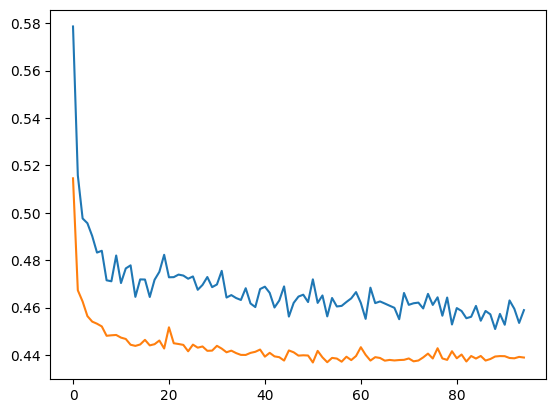

In [124]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

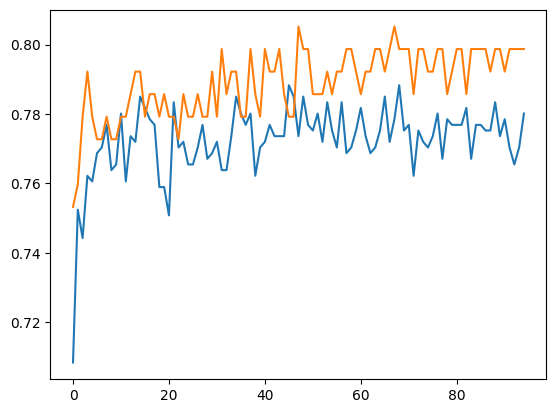

In [125]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

##Above diagrams
 shows that there is no Overfitting as approximately same accuarcy and loss on validatoin data as for training data.